In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 데이터 불러오기
df = pd.read_csv("C:\\Users\\axhtl\\OneDrive\\바탕 화면\\학교\\인공지능개론\\BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [2]:
# 컬럼명 확인
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [3]:
# 레이블 갯수 확인(숫자)
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 자동 탐지
categorical_cols = df.select_dtypes(include=['object']).columns

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df_encoded

In [5]:
# 데이터 확인
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [6]:
# 결측치 확인
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [7]:
# 중앙값 계산
median_Genetic_Pedigree_Coefficient = df['Genetic_Pedigree_Coefficient'].median()
median_alcohol_consumption_per_day = df['alcohol_consumption_per_day'].median()

# 'score' 컬럼의 null 값을 평균으로 채움
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(median_Genetic_Pedigree_Coefficient)
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(median_alcohol_consumption_per_day)
df['Pregnancy'] = df['Pregnancy'].fillna(0)

In [8]:
# 결측치 확인
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [9]:
X = df.drop('Blood_Pressure_Abnormality', axis=1)
X.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,250.0,2,1,1
1,2,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


In [10]:
y = df['Blood_Pressure_Abnormality']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Blood_Pressure_Abnormality, dtype: int64

In [11]:
X = df.drop('Blood_Pressure_Abnormality', axis=1).values

In [12]:
y = y.values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 14), (400, 14), (1600,), (400,))

In [15]:
import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [16]:
from torch.utils.data import TensorDataset, DataLoader

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [18]:
import torch.nn as nn
import torch.optim as optim

class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 84.2941, Accuracy: 48.25%
Epoch 2/20, Loss: 29.5488, Accuracy: 48.50%
Epoch 3/20, Loss: 17.4659, Accuracy: 50.25%
Epoch 4/20, Loss: 21.3435, Accuracy: 50.25%
Epoch 5/20, Loss: 20.7798, Accuracy: 47.50%
Epoch 6/20, Loss: 17.0384, Accuracy: 49.00%
Epoch 7/20, Loss: 21.2596, Accuracy: 52.00%
Epoch 8/20, Loss: 20.4777, Accuracy: 50.50%
Epoch 9/20, Loss: 13.7364, Accuracy: 48.00%
Epoch 10/20, Loss: 21.7388, Accuracy: 51.25%
Epoch 11/20, Loss: 10.6714, Accuracy: 51.50%
Epoch 12/20, Loss: 13.9539, Accuracy: 48.00%
Epoch 13/20, Loss: 15.9472, Accuracy: 52.00%
Epoch 14/20, Loss: 12.1817, Accuracy: 51.75%
Epoch 15/20, Loss: 10.5310, Accuracy: 51.75%
Epoch 16/20, Loss: 11.8674, Accuracy: 52.25%
Epoch 17/20, Loss: 7.7680, Accuracy: 51.00%
Epoch 18/20, Loss: 8.9805, Accuracy: 48.00%
Epoch 19/20, Loss: 8.8702, Accuracy: 50.75%
Epoch 20/20, Loss: 11.9513, Accuracy: 48.00%
Training complete.


In [21]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[  1 207]
 [  1 191]]
F1 Score: 0.32
Precision: 0.49
Recall: 0.48
Specificity: 0.50


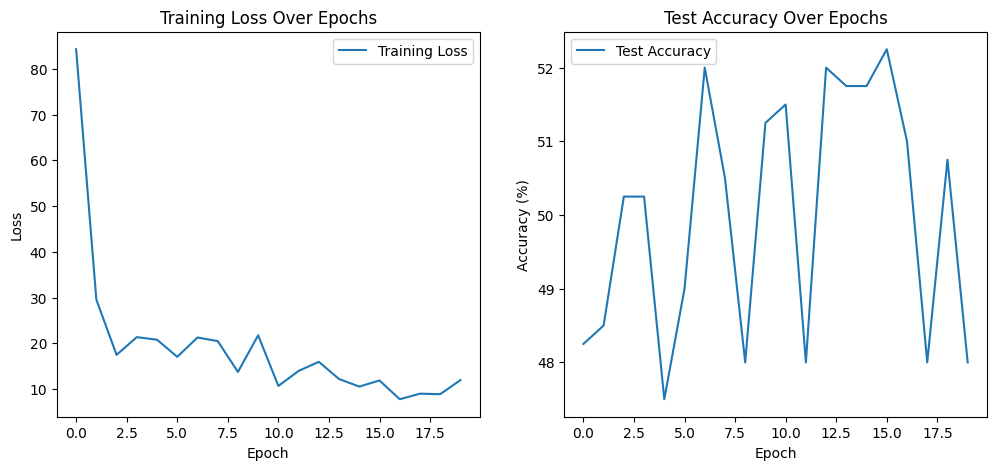

In [22]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (Windows용: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. countplot을 이용하여 성별에 따른 흡연 여부 인원 수 측정

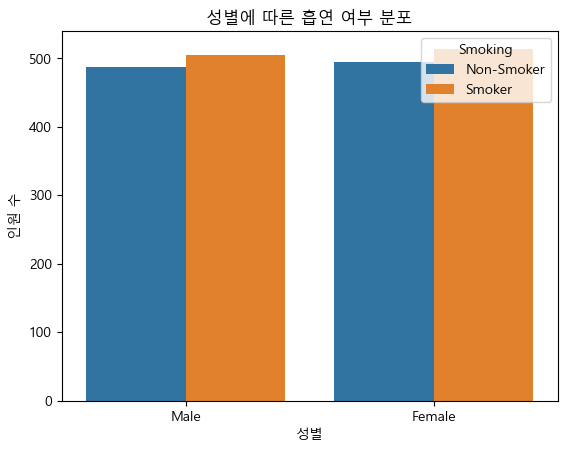

In [25]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# 성별, 흡연 여부 숫자를 문자로 바꿔서 보기 좋게 만들기
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})
df['Smoking'] = df['Smoking'].map({1: 'Smoker', 0: 'Non-Smoker'})

# countplot 그리기
sns.countplot(data=df, x='Sex', hue='Smoking')

plt.title('성별에 따른 흡연 여부 분포')
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.show()

In [24]:
print(df.head())  # 첫 몇 개의 데이터 확인

   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        0.0        0   
2                          0.91   70   49    0        0.0        0   
3                          0.43   71   50    0        0.0        0   
4                          0.83   52   19    0        0.0        0   

   Physical_activity  salt_content_in_the_diet  alcohol_consumption_per_day  \
0              45961                     48071                        250.0   


### 2. boxplot을 이용하여 Physical_activity의 범위를 확인

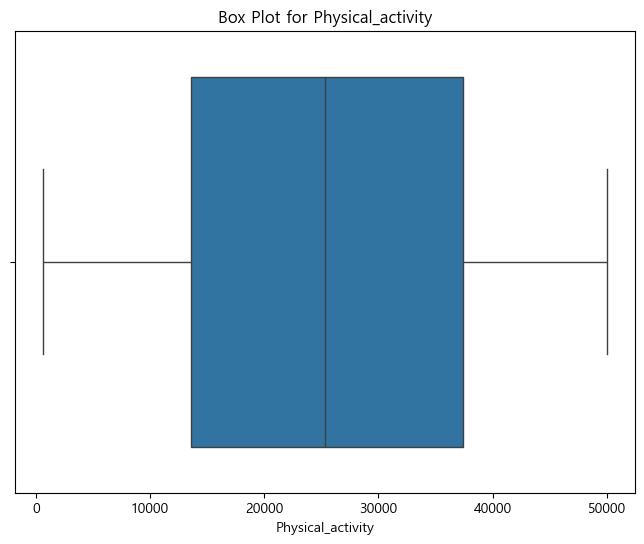

In [26]:
# box plot으로 Physical_activity 컬럼의 범위를 보여주는 소스코드

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Physical_activity'])

# 그래프 제목 추가
plt.title('Box Plot for Physical_activity')

# 그래프 표시
plt.show()

### 3. heatmap을 이용하여 Blood_Pressure_Abnormality과 다른 컬럼의 상관관계 확인

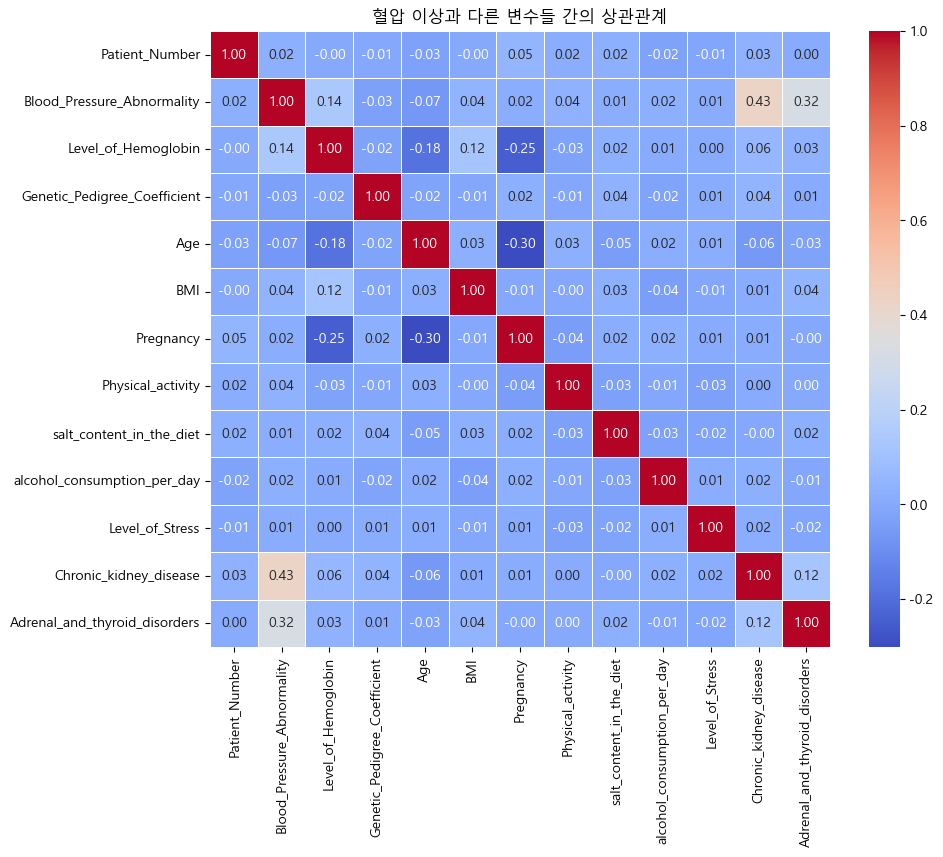

Blood_Pressure_Abnormality       1.000000
Chronic_kidney_disease           0.429188
Adrenal_and_thyroid_disorders    0.318598
Level_of_Hemoglobin              0.139488
BMI                              0.040193
Physical_activity                0.037952
Patient_Number                   0.021430
alcohol_consumption_per_day      0.019260
Pregnancy                        0.016015
salt_content_in_the_diet         0.014199
Level_of_Stress                  0.009304
Genetic_Pedigree_Coefficient    -0.032422
Age                             -0.066322
Name: Blood_Pressure_Abnormality, dtype: float64


In [27]:
# heatmap을 이용해서 Blood_Pressure_Abnormality과 다른 컬럼의 상관관계 확인

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택하기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 상관행렬 계산
corr_matrix = df[numeric_columns].corr()

# Blood_Pressure_Abnormality와 다른 컬럼 간의 상관관계만 선택
blood_pressure_corr = corr_matrix['Blood_Pressure_Abnormality'].sort_values(ascending=False)

# 상관행렬 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 그래프 제목
plt.title('혈압 이상과 다른 변수들 간의 상관관계')

# 그래프 표시
plt.show()

# Blood_Pressure_Abnormality와 다른 변수들 간의 상관계수 출력
print(blood_pressure_corr)

### 4. histoplot을 이용하여 나이 분포 확인

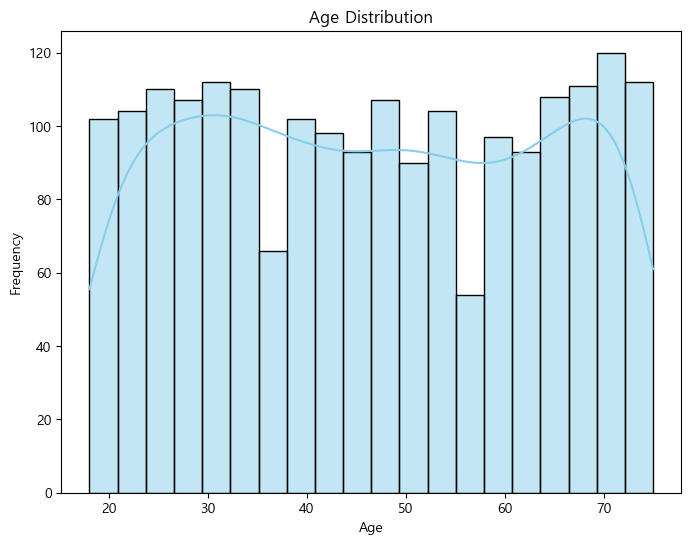

In [28]:
# Age 컬럼의 histoplot을 보여주는 소스코드

# Age 컬럼의 히스토그램 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')  # kde=True로 커널 밀도 추정선 추가

# 그래프 제목과 레이블
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

### 5. lineplot을 이용하여 나이에 따른 BPA와 BMI 평균 변화를 라인으로 표현

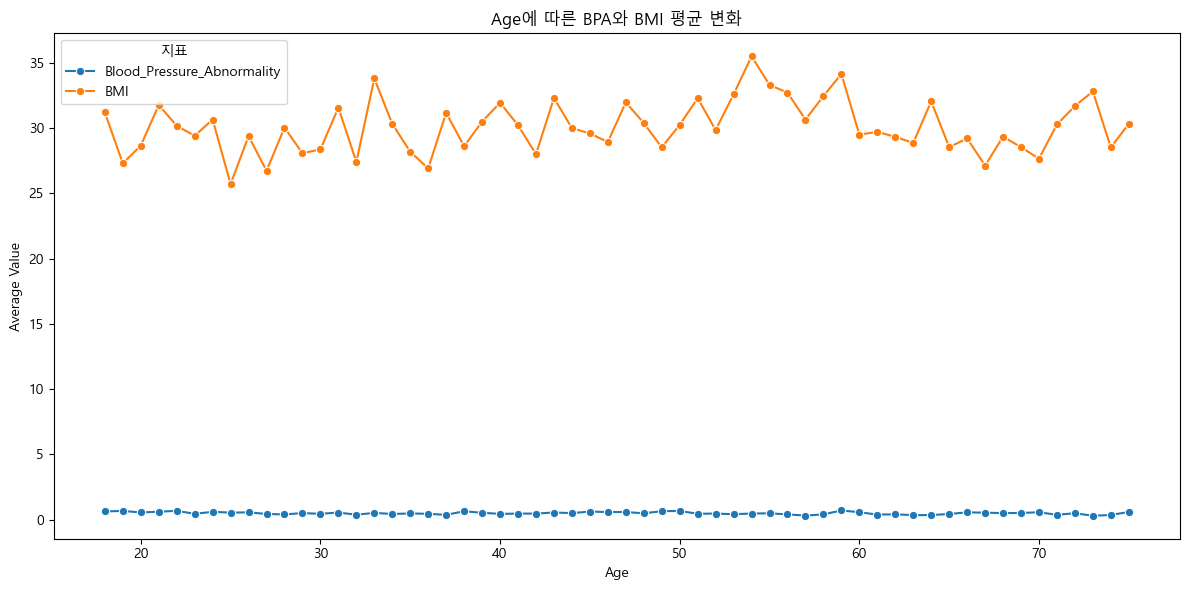

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age를 기준으로 평균 BPA와 BMI 구하기
age_avg = df.groupby('Age')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()

# long-form 형태로 변환
df_melted = pd.melt(
    age_avg,
    id_vars='Age',
    value_vars=['Blood_Pressure_Abnormality', 'BMI'],
    var_name='Variable',
    value_name='Value'
)

# lineplot 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Age', y='Value', hue='Variable', marker='o')

plt.title('Age에 따른 BPA와 BMI 평균 변화')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.legend(title='지표')
plt.tight_layout()
plt.show()

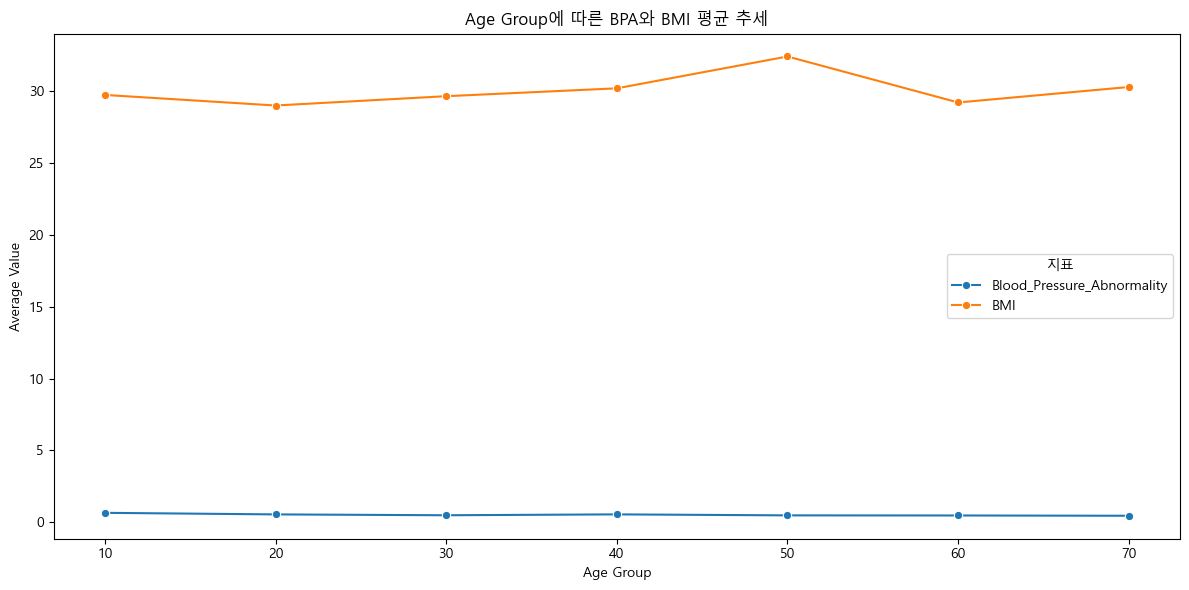

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age를 10살 단위로 그룹핑
df['Age_group'] = (df['Age'] // 10) * 10

# 그룹별 평균 계산
age_group_avg = df.groupby('Age_group')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()

# long-form으로 변환
df_melted = pd.melt(
    age_group_avg,
    id_vars='Age_group',
    value_vars=['Blood_Pressure_Abnormality', 'BMI'],
    var_name='Variable',
    value_name='Value'
)

# lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Age_group', y='Value', hue='Variable', marker='o')

plt.title('Age Group에 따른 BPA와 BMI 평균 추세')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.legend(title='지표')
plt.tight_layout()
plt.show()

### 6. scatterplot을 이용하여 나이에 따른 BPA와 BMI 평균 변화를 점으로 표현

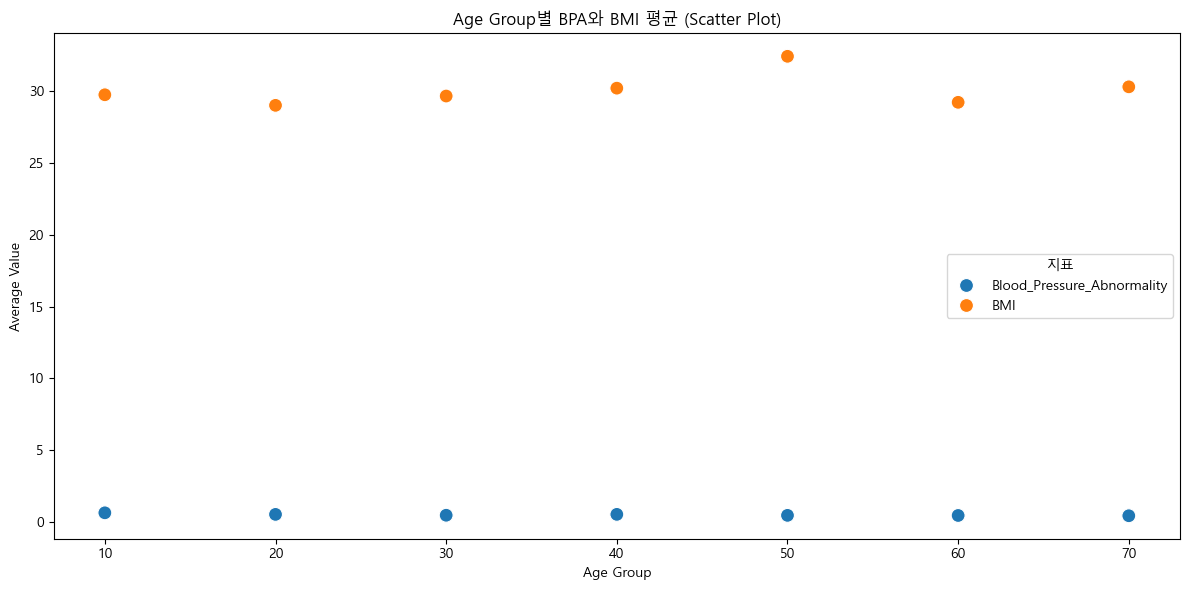

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age를 10살 단위로 그룹핑
df['Age_group'] = (df['Age'] // 10) * 10

# Age_group별 평균 계산
age_group_avg = df.groupby('Age_group')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()

# long-form으로 변환
df_melted = pd.melt(
    age_group_avg,
    id_vars='Age_group',
    value_vars=['Blood_Pressure_Abnormality', 'BMI'],
    var_name='Variable',
    value_name='Value'
)

# scatterplot 그리기
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_melted, x='Age_group', y='Value', hue='Variable', s=100)

plt.title('Age Group별 BPA와 BMI 평균 (Scatter Plot)')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.legend(title='지표')
plt.tight_layout()
plt.show()

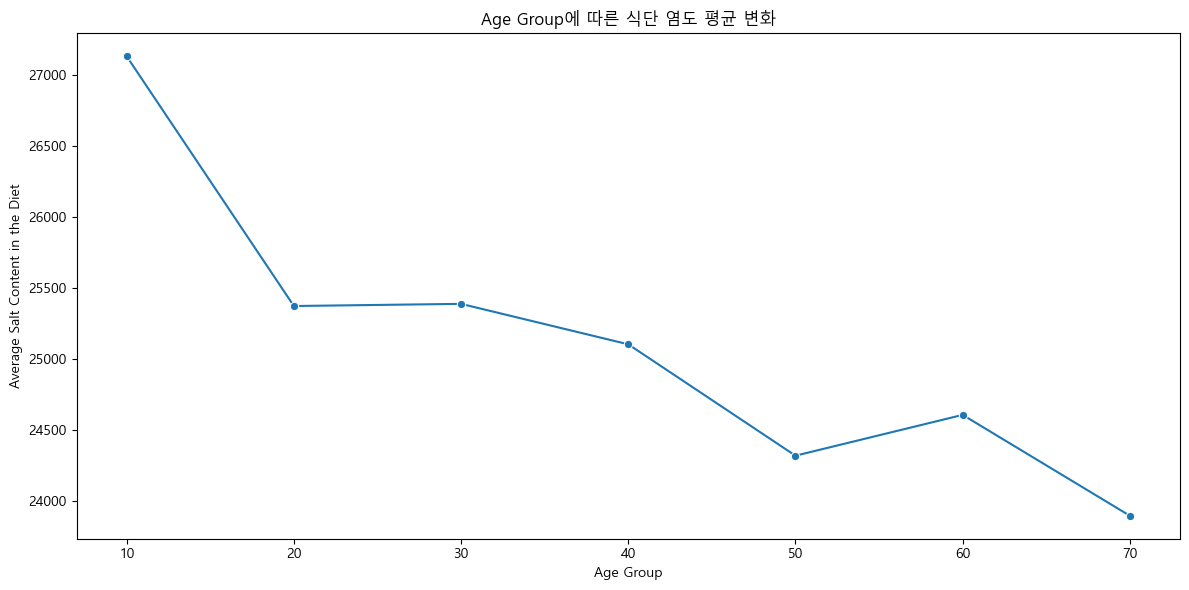

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age를 10살 단위로 그룹핑
df['Age_group'] = (df['Age'] // 10) * 10

# Age_group별 평균 salt_content_in_the_diet 계산
age_salt_avg = df.groupby('Age_group')['salt_content_in_the_diet'].mean().reset_index()

# lineplot 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_salt_avg, x='Age_group', y='salt_content_in_the_diet', marker='o')

plt.title('Age Group에 따른 식단 염도 평균 변화')
plt.xlabel('Age Group')
plt.ylabel('Average Salt Content in the Diet')
plt.tight_layout()
plt.show()